# Task 1 - Graph-Search

In [132]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from collections import deque

def cargar_imagen(ruta):
    imagen = cv2.imread(ruta)
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    return imagen

def es_color(pixel, referencia, tolerancia=30):
    return np.all(np.abs(pixel - referencia) <= tolerancia)

def imagen_a_matriz(imagen, tam_bloque=10):
    alto, ancho, _ = imagen.shape
    if alto != ancho:
        print("Error: La imagen no es cuadrada.")
        return None, None, None, None, None

    filas, cols = alto // tam_bloque, ancho // tam_bloque
    matriz = np.zeros((filas, cols), dtype=int)
    inicio = None
    metas = []

    COLOR_NEGRO = np.array([0, 0, 0])
    COLOR_BLANCO = np.array([255, 255, 255])
    COLOR_ROJO = np.array([255, 0, 0])
    COLOR_VERDE = np.array([0, 255, 0])

    for i in range(filas):
        for j in range(cols):
            bloque = imagen[i * tam_bloque:(i + 1) * tam_bloque, j * tam_bloque:(j + 1) * tam_bloque]
            color_promedio = np.mean(bloque, axis=(0, 1))

            if es_color(color_promedio, COLOR_BLANCO):
                matriz[i, j] = 0
            elif es_color(color_promedio, COLOR_NEGRO):
                matriz[i, j] = 1
            elif es_color(color_promedio, COLOR_ROJO):
                matriz[i, j] = 2
                inicio = (i, j)
            elif es_color(color_promedio, COLOR_VERDE):
                matriz[i, j] = 3
                metas.append((i, j))

    return matriz, inicio, metas, filas, cols

def dibujar_matriz(matriz, factor_escala=8):
    colores = {0: [255, 255, 255], 1: [0, 0, 0], 2: [255, 0, 0], 3: [0, 255, 0]}
    imagen = np.zeros((matriz.shape[0], matriz.shape[1], 3), dtype=np.uint8)

    for i in range(matriz.shape[0]):
        for j in range(matriz.shape[1]):
            imagen[i, j] = colores[matriz[i, j]]

    plt.figure(figsize=(matriz.shape[1] // factor_escala, matriz.shape[0] // factor_escala))
    plt.imshow(imagen, interpolation="nearest")
    plt.axis("off")
    plt.show()

def procesar_imagen(ruta):
    imagen = cargar_imagen(ruta)
    matriz, inicio, metas, filas, cols = imagen_a_matriz(imagen, tam_bloque=10)
    if inicio is None or not metas:
        print("Error: La imagen no tiene un inicio o metas válidas.")
        return

    dibujar_matriz(matriz)


 Para ejecutar el programa es el siguiente comando:

 resolver_laberinto("xxx.bmp") Puede ser .bmp o .png

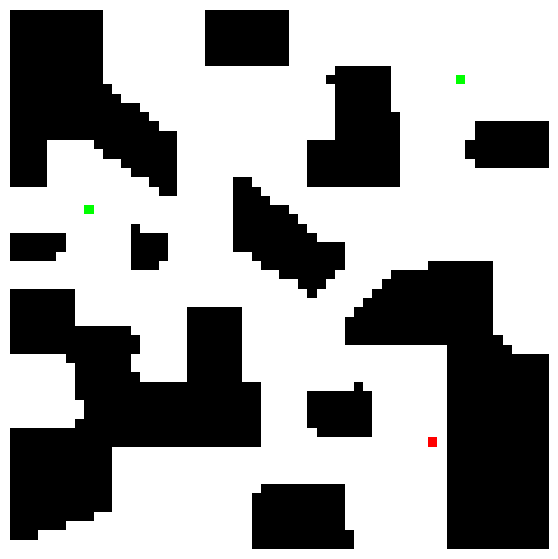

In [133]:
resolver_laberinto("Test.bmp")

Repositorio: https://github.com/donmatthiuz/IA/tree/lab5